In [ ]:
import numpy as np
import scipy.stats as sps

In [ ]:
sample1 = sps.norm(loc = 1, scale = 2).rvs(size = 100)
sample2 = sps.uniform(loc = -1, scale = 2).rvs(size = 100)
sample_pooled = np.concatenate([sample1, sample2])

print(sample1[:5])
print(sample2[:5])
print(sample_pooled[:5])

[ 2.83241895  3.56155037  2.35483658 -0.62216419 -0.12054756]
[ 0.46348094 -0.98029915 -0.34339783 -0.80461015 -0.58614516]
[ 2.83241895  3.56155037  2.35483658 -0.62216419 -0.12054756]


In [ ]:
#1
print("X1:")
print("\tmean: %.3f" %sample1.mean())
print("\tvar: %.3f" %sample1.var())
print("\tstd: %.3f" %sample1.std())

print("X2:")
print("\tmean: %.3f" %sample2.mean())
print("\tvar: %.3f" %sample2.var())
print("\tstd: %.3f" %sample2.std())

print("Pooled:")
print("\tmean: %.3f" %sample_pooled.mean())
print("\tvar: %.3f" %sample_pooled.var())
print("\tstd: %.3f" %sample_pooled.std())

X1:
	mean: 1.164
	var: 3.851
	std: 1.962
X2:
	mean: 0.000
	var: 0.340
	std: 0.583
Pooled:
	mean: 0.582
	var: 2.434
	std: 1.560


In [ ]:
from statsmodels.stats.weightstats import ztest as ztest

In [ ]:
def fun_s0_sample(sample):
    s0_sample = 0
    for x in sample:
        s0_sample += (x - 1)**2
    s0_sample /= 100
    return s0_sample

def fun_s_sample(sample):
    s_sample = 0
    x_mean = sample.mean()
    for x in sample:
        s_sample += (x - x_mean)**2
    s_sample /= (100 - 1)
    return s_sample

In [ ]:
#2
z_sample, p_value1 = ztest(sample1, value = 1)
print("z_sample = %.3f" % z_sample)
print("p_value1 = %.3f" % p_value1)
print("\n")

t_sample, p_value2 = sps.ttest_1samp(sample1, 1)
print("t_sample = %.3f" % z_sample)
print("p_value2 = %.3f" % p_value2)
print("\n")

s0_sample = fun_s0_sample(sample1)
chisquare_sample1 = 100 * s0_sample / 3

p1 = sps.chi2.cdf(chisquare_sample1, 100)
p_value3 = 2 * min(p1, 1 - p1)
print("chisquare_sample1 = %.3f" % chisquare_sample1)
print("p_value3 = %.3f" % p_value3)
print("\n")

s_sample = fun_s_sample(sample1)
chisquare_sample2 = (100 - 1) * s_sample / 3

p2 = sps.chi2.cdf(chisquare_sample2, 100 - 1)
p_value4 = 2 * min(p2, 1 - p2)
print("chisquare_sample = %.3f" % chisquare_sample2)
print("p_value4 = %.3f" % p_value4)

z_sample = 0.833
p_value1 = 0.405


t_sample = 0.833
p_value2 = 0.407


chisquare_sample1 = 129.256
p_value3 = 0.052


chisquare_sample = 128.357
p_value4 = 0.050


In [ ]:
#3
tt_sample, p_value1 = sps.ttest_ind(sample1, sample2)
print("tt_sample = %.3f" % tt_sample)
print("p_value1 = %.3f" % p_value1)
print("\n")

s0_sample1 = fun_s0_sample(sample1)
s0_sample2 = fun_s0_sample(sample2)
f_sample1 = s0_sample1 / s0_sample2

p1 =  sps.f(100, 100).cdf(f_sample1)
p_value2 = 2 * min(p1, 1 - p1)
print("f_sample1 = %.3f" % f_sample1)
print("p_value2 = %.3f" % p_value2)
print("\n")

s_sample1 = fun_s_sample(sample1)
s_sample2 = fun_s_sample(sample2)
f_sample2 = s_sample1 / s_sample2

p2 =  sps.f(100 - 1, 100 - 1).cdf(f_sample2)
p_value3 = 2 * min(p2, 1 - p2)
print("f_sample2 = %.3f" % f_sample2)
print("p_value3 = %.3f" % p_value3)

tt_sample = 5.656
p_value1 = 0.000


f_sample1 = 2.895
p_value2 = 0.000


f_sample2 = 11.314
p_value3 = 0.000


In [ ]:
#4
x_sample = list()
s = list()
for _ in range(1000):
    sample = sps.norm(loc = 1, scale = 2).rvs(size = 100)
    x_sample.append(sample)
    s.append(fun_s_sample(sample))

z = list()
p_value = list()
for i in range(1000):
    z.append(((x_sample[i]).mean() - 1)/((s[i])**(0.5)/10))

    p = sps.t(99).cdf(z[i])
    p_value.append(2 * min(p, 1 - p))

print("Z:")
print("\tmean: %.3f" %np.mean(z))
print("\tvar: %.3f" %np.var(z))
print("\tstd: %.3f" %np.std(z))

print("P-value:")
print("\tmean: %.3f" %np.mean(p_value))
print("\tvar: %.3f" %np.var(p_value))
print("\tstd: %.3f" %np.std(p_value))

Z:
	mean: 0.007
	var: 0.973
	std: 0.987
P-value:
	mean: 0.502
	var: 0.082
	std: 0.286


In [ ]:
import matplotlib.pyplot as plt

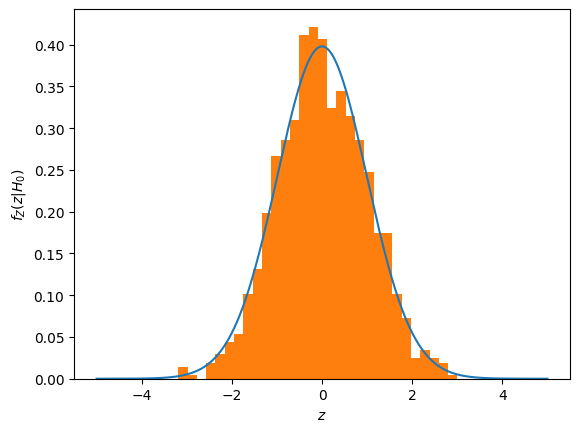

In [ ]:
x = np.linspace(-5, 5, 5000)
plt.plot(x, sps.t(99).pdf(x))
plt.hist(np.array(z), bins = 30, density=True)
plt.ylabel('$f_Z(z|H_0)$')
plt.xlabel('$z$');

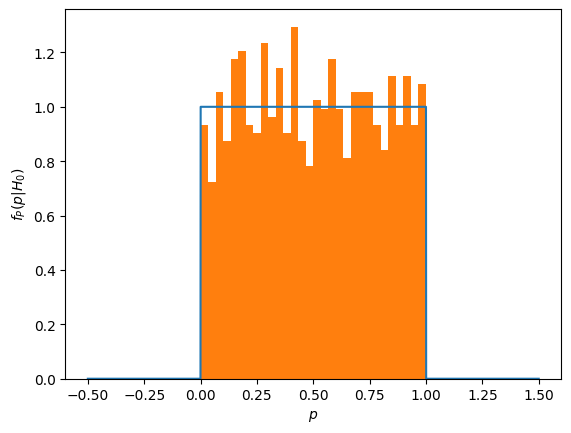

In [ ]:
x = np.linspace(-0.5, 1.5, 5000)
plt.plot(x, sps.uniform(loc=0, scale=1).pdf(x))
plt.hist(np.array(p_value), bins=30, density=True);
plt.ylabel('$f_P(p|H_0)$')
plt.xlabel('$p$');